In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [33]:
from datetime import datetime
import pytz

def parse_str(x):
    """
    Returns the string delimited by two characters.

    Example:
        `>>> parse_str('[my string]')`
        `'my string'`
    """
    return x[1:-1]

def parse_datetime(x):
    '''
    Parses datetime with timezone formatted as:
        `[day/month/year:hour:minute:second zone]`

    Example:
        `>>> parse_datetime('13/Nov/2015:11:45:42 +0000')`
        `datetime.datetime(2015, 11, 3, 11, 45, 4, tzinfo=<UTC>)`

    Due to problems parsing the timezone (`%z`) with `datetime.strptime`, the
    timezone will be obtained using the `pytz` library.
    '''
    dt = datetime.strptime(x[1:-7], '%d/%b/%Y:%H:%M:%S')
    dt_tz = int(x[-6:-3])*60+int(x[-3:-1])
    return dt.replace(tzinfo=pytz.FixedOffset(dt_tz))

In [34]:
import re
import pandas as pd

data = pd.read_csv(
    'https://my-dataset-collection.s3.ap-south-1.amazonaws.com/stjgps_access.log.1',
    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
    engine='python',
    na_values='-',
    header=None,
    usecols=[0, 3, 4, 5, 6, 7, 8],
    names=['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'],
    converters={'time': parse_datetime,
                'request': parse_str,
                'status': int,
                'size': int,
                'referer': parse_str,
                'user_agent': parse_str})

In [35]:
data.head(5)

,ip,time,request,status,size,referer,user_agent
0,66.249.75.8,2021-07-13 00:09:29+05:30,GET /school_club/ HTTP/1.1,200,12102,NaN,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...
1,66.249.75.26,2021-07-13 00:19:25+05:30,GET /school_strength/ HTTP/1.1,200,11590,NaN,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
2,66.249.75.8,2021-07-13 00:26:18+05:30,GET / HTTP/1.1,200,18137,NaN,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
3,192.241.223.158,2021-07-13 00:42:18+05:30,GET /actuator/health HTTP/1.1,404,5028,NaN,Mozilla/5.0 zgrab/0.x
4,178.159.37.139,2021-07-13 00:43:28+05:30,GET /contact.php HTTP/1.0,404,5246,https://stjgps.org/contact.php,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...


In [5]:
# ip = data['ip'].unique()

In [6]:
# ip

In [7]:
# data.info()

In [8]:
clean_data = data[["ip","status"]]

In [9]:
clean_data

,ip,status
0,66.249.75.8,200
1,66.249.75.26,200
2,66.249.75.8,200
3,192.241.223.158,404
4,178.159.37.139,404
...,...,...
1620,106.207.23.21,200
1621,66.249.75.25,304
1622,106.207.23.21,200
1623,106.207.23.21,200


In [10]:
ip_status_data = clean_data.groupby(["ip",'status']).size().reset_index(name="visited")

In [11]:
ip_status_data

,ip,status,visited
0,1.15.175.155,200,1
1,101.36.111.167,200,2
2,103.159.178.199,404,1
3,104.143.83.241,200,2
4,106.207.23.21,200,108
...,...,...,...
225,74.120.14.55,200,1
226,91.188.215.198,301,1
227,91.247.220.24,200,1
228,94.16.121.91,200,1


In [12]:
ip_status_data['ip'].value_counts()

202.168.84.90    7
106.207.23.21    5
157.42.211.38    5
66.249.75.25     4
157.42.99.210    4
                ..
171.13.14.52     1
23.251.102.90    1
113.31.108.14    1
171.13.14.76     1
157.35.238.50    1
Name: ip, Length: 153, dtype: int64

In [13]:
ip_status_data['status'].value_counts()

200    109
404     75
301     18
408     11
304      7
403      4
400      3
206      2
302      1
Name: status, dtype: int64

In [14]:
final_train_data = ip_status_data.drop(['ip'],axis=1)

In [15]:
final_train_data

,status,visited
0,200,1
1,200,2
2,404,1
3,200,2
4,200,108
...,...,...
225,200,1
226,301,1
227,200,1
228,200,1


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [17]:
data_scaled = sc.fit_transform(final_train_data)

In [18]:
print(data_scaled)

[[-0.98277442 -0.35493994]
 [-0.98277442 -0.29641938]
 [ 1.14611643 -0.35493994]
 [-0.98277442 -0.29641938]
 [-0.98277442  5.90676042]
 [-0.92015998 -0.17937825]
 [ 0.07123527 -0.12085769]
 [ 1.14611643 -0.06233712]
 [ 1.18785939  0.2302657 ]
 [-0.98277442 -0.35493994]
 [-0.98277442 -0.35493994]
 [-0.98277442 -0.29641938]
 [-0.98277442 -0.35493994]
 [-0.98277442 -0.35493994]
 [-0.98277442 -0.35493994]
 [-0.98277442 -0.35493994]
 [-0.98277442 -0.35493994]
 [ 1.14611643 -0.35493994]
 [-0.98277442 -0.35493994]
 [-0.98277442 -0.29641938]
 [-0.98277442 -0.29641938]
 [-0.98277442 -0.29641938]
 [-0.98277442 -0.35493994]
 [-0.98277442 -0.35493994]
 [-0.98277442 -0.35493994]
 [-0.98277442 -0.35493994]
 [-0.98277442 -0.35493994]
 [-0.98277442 -0.29641938]
 [-0.98277442 -0.35493994]
 [-0.98277442 -0.29641938]
 [ 0.07123527 -0.35493994]
 [ 1.14611643 -0.35493994]
 [ 1.14611643 -0.35493994]
 [-0.98277442 -0.35493994]
 [ 0.07123527 -0.35493994]
 [ 1.14611643 -0.17937825]
 [-0.98277442 -0.35493994]
 

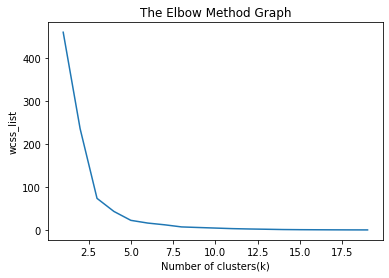

In [19]:
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 20):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 32)  
    kmeans.fit(data_scaled)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 20), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show() 

In [20]:
model = KMeans(n_clusters=5)

In [21]:
pred = model.fit_predict(data_scaled)

In [22]:
final_predicted_data = pd.DataFrame(data_scaled,columns=['Status_Scaled','Frequency_scaled'])
final_predicted_data['Clusters'] = pred
final_data = pd.concat([ip_status_data,final_predicted_data],axis=1)

In [23]:
final_data

,ip,status,visited,Status_Scaled,Frequency_scaled,Clusters
0,1.15.175.155,200,1,-0.982774,-0.354940,2
1,101.36.111.167,200,2,-0.982774,-0.296419,2
2,103.159.178.199,404,1,1.146116,-0.354940,1
3,104.143.83.241,200,2,-0.982774,-0.296419,2
4,106.207.23.21,200,108,-0.982774,5.906760,3
...,...,...,...,...,...,...
225,74.120.14.55,200,1,-0.982774,-0.354940,2
226,91.188.215.198,301,1,0.071235,-0.354940,4
227,91.247.220.24,200,1,-0.982774,-0.354940,2
228,94.16.121.91,200,1,-0.982774,-0.354940,2


<AxesSubplot:xlabel='ip'>

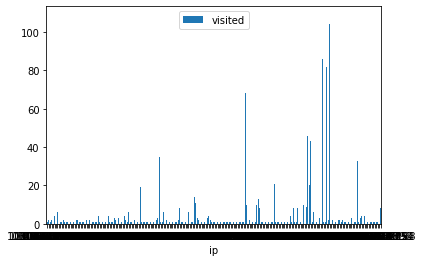

In [24]:
final_data.plot.bar(x='ip',y='visited',rot=0)

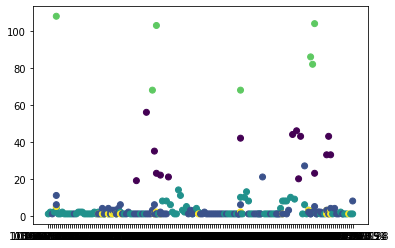

In [25]:
plt.scatter(final_data['ip'],final_data['visited'],c=final_data['Clusters'])

In [26]:
Block_IP = []
Block_ip_list = []
for key, value in final_data.iloc[:,[0,2,5]].iterrows():
    if value.visited > 40:
        Block_IP.append([value.Clusters,value.ip, value.visited])
        Block_ip_list.append(value.ip)
Block_IP
Block_ip_list

# final_list = []
# for sub_list in Block_IP:
#     final_list.append(Block_IP[0][1])
# final_list[0]


['106.207.23.21',
 '157.35.231.66',
 '157.35.241.23',
 '157.42.211.38',
 '202.168.84.90',
 '202.168.84.90',
 '42.236.10.114',
 '42.236.10.75',
 '42.236.10.93',
 '47.9.241.160',
 '47.9.244.121',
 '49.37.76.200',
 '66.249.75.26']

In [27]:
final_data

,ip,status,visited,Status_Scaled,Frequency_scaled,Clusters
0,1.15.175.155,200,1,-0.982774,-0.354940,2
1,101.36.111.167,200,2,-0.982774,-0.296419,2
2,103.159.178.199,404,1,1.146116,-0.354940,1
3,104.143.83.241,200,2,-0.982774,-0.296419,2
4,106.207.23.21,200,108,-0.982774,5.906760,3
...,...,...,...,...,...,...
225,74.120.14.55,200,1,-0.982774,-0.354940,2
226,91.188.215.198,301,1,0.071235,-0.354940,4
227,91.247.220.24,200,1,-0.982774,-0.354940,2
228,94.16.121.91,200,1,-0.982774,-0.354940,2


In [28]:
Block_ip_list

['106.207.23.21',
 '157.35.231.66',
 '157.35.241.23',
 '157.42.211.38',
 '202.168.84.90',
 '202.168.84.90',
 '42.236.10.114',
 '42.236.10.75',
 '42.236.10.93',
 '47.9.241.160',
 '47.9.244.121',
 '49.37.76.200',
 '66.249.75.26']